In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 94.5 MB/s eta 0:00:00


In [ ]:
import rasterio
import numpy
from google.colab import files
import matplotlib.pyplot as plt

Saving Capture d'écran 2024-11-27 174808.png to Capture d'écran 2024-11-27 174808 (3).png


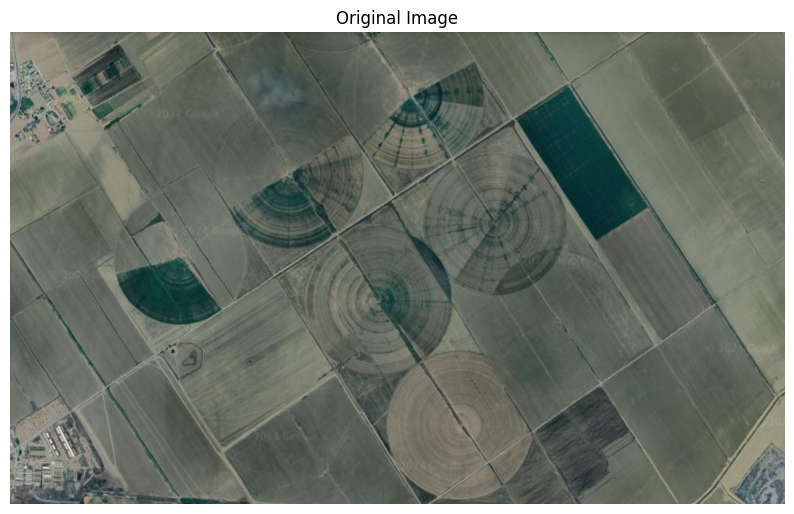

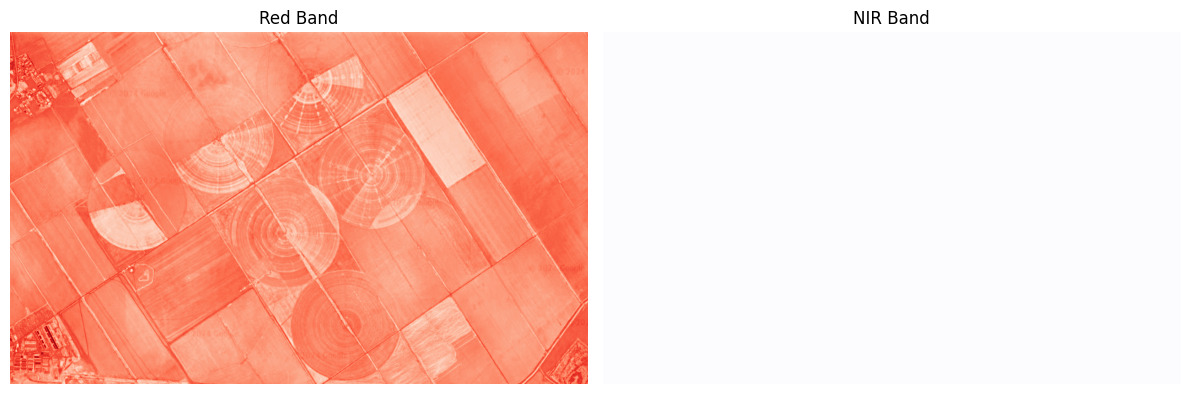

In [ ]:
# Step 1: Upload the GeoTIFF file
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Step 2: Read the red and NIR bands
with rasterio.open(filename) as src:
    band_red = src.read(3)  # Assuming red is the third band
    band_nir = src.read(4)  # Assuming NIR is the fourth band

with rasterio.open(filename) as src:
    # Read all bands (assuming it's an RGB or RGBA image)
    image = src.read([1, 2, 3]).transpose((1, 2, 0))  # Convert to HxWxC format

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Step 3: Visualize the red and NIR bands
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display the red band
ax[0].imshow(band_red, cmap='Reds')
ax[0].set_title('Red Band')
ax[0].axis('off')

# Display the NIR band
ax[1].imshow(band_nir, cmap='Purples')
ax[1].set_title('NIR Band')
ax[1].axis('off')

plt.tight_layout()
plt.show()

# calculating ndvi

In [ ]:
# Do not display error when divided by zero

numpy.seterr(divide='ignore', invalid='ignore')

# NDVI
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)

In [ ]:
print(numpy.nanmin(ndvi))
print(numpy.nanmax(ndvi))

0.1091703056768559
35.285714285714285


In [ ]:
# get the metadata of original GeoTIFF:
meta = src.meta
print(meta)

# get the dtype of our NDVI array:
ndvi_dtype = ndvi.dtype
print(ndvi_dtype)

# set the source metadata as kwargs we'll use to write the new data:
kwargs = meta

# update the 'dtype' value to match our NDVI array's dtype:
kwargs.update(dtype=ndvi_dtype)

# update the 'count' value since our output will no longer be a 4-band image:
kwargs.update(count=1)


{'driver': 'PNG', 'dtype': 'uint8', 'nodata': None, 'width': 1162, 'height': 708, 'count': 4, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
float64


In [ ]:
from matplotlib import colors


class MidpointNormalize(colors.Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):

        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return numpy.ma.masked_array(numpy.interp(value, x, y), numpy.isnan(value))

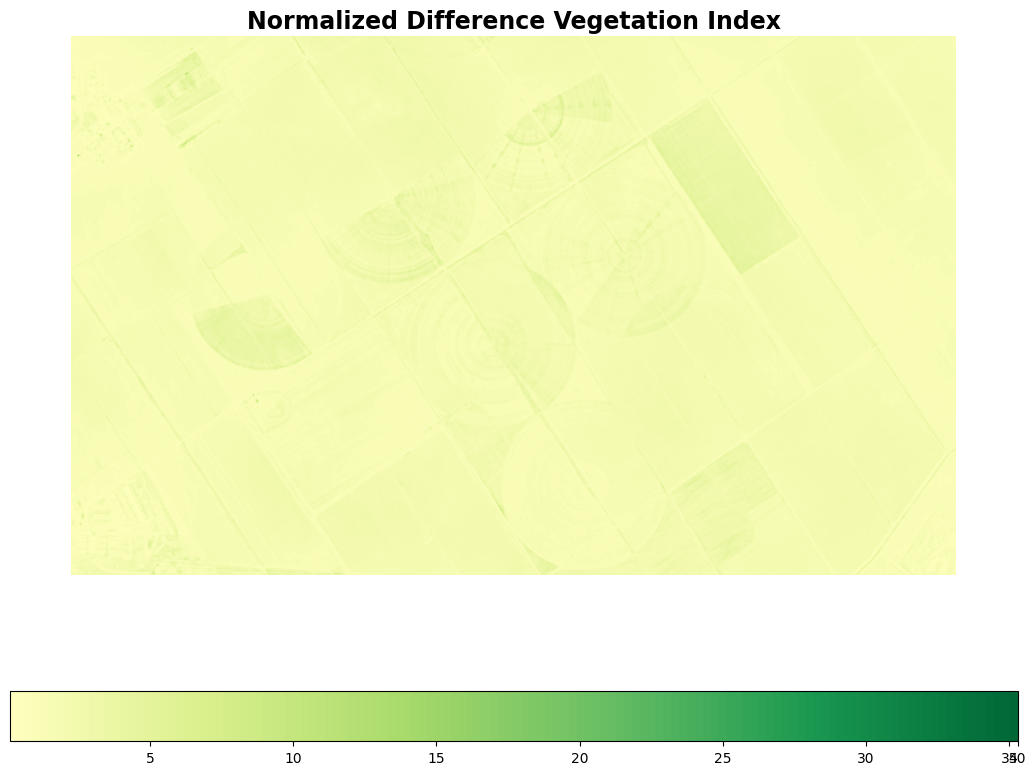

In [ ]:
min=numpy.nanmin(ndvi)
max=numpy.nanmax(ndvi)

# Set our custom midpoint for most effective NDVI analysis
mid=0.1

# Setting color scheme ref:https://matplotlib.org/users/colormaps.html as a reference
colormap = plt.cm.RdYlGn
norm = MidpointNormalize(vmin=min, vmax=max, midpoint=mid)
fig = plt.figure(figsize=(20,10))


ax = fig.add_subplot(111)

# Use 'imshow' to specify the input data, colormap, min, max, and norm for the colorbar
cbar_plot = ax.imshow(ndvi, cmap=colormap, norm=norm)

# Turn off the display of axis labels
ax.axis('off')

# Set a title
ax.set_title('Normalized Difference Vegetation Index', fontsize=17, fontweight='bold')

# Configure the colorbar
cbar = fig.colorbar(cbar_plot, orientation='horizontal', shrink=0.65)

# Call 'savefig' to save this plot to an image file
fig.savefig("ndvi-image.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

# let's visualize
plt.show()

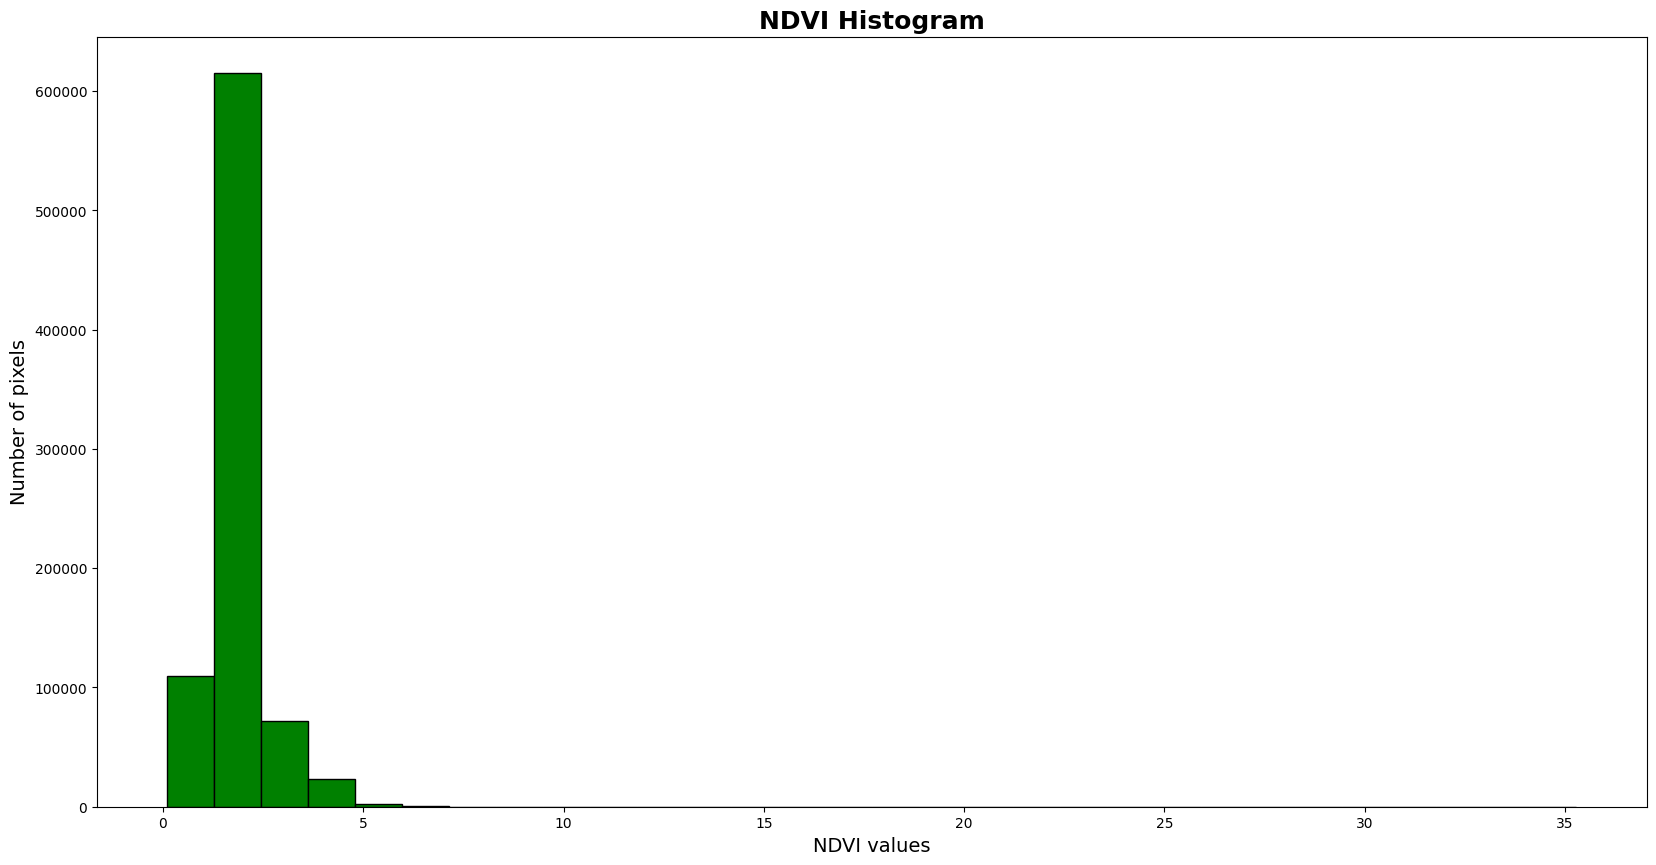

In [ ]:
# Define a new figure
fig2 = plt.figure(figsize=(20,10))

# Give this new figure a subplot, which will contain the histogram itself
ax = fig2.add_subplot(111)

# Add a title & (x,y) labels to the plot
plt.title("NDVI Histogram", fontsize=18, fontweight='bold')
plt.xlabel("NDVI values", fontsize=14)
plt.ylabel("Number of pixels", fontsize=14)


# For the x-axis, we want to count every pixel that is not an empty value
x = ndvi[~numpy.isnan(ndvi)]
color = 'g'
# call 'hist` with our x-axis, bins, and color details
ax.hist(x,bins=30,color=color,histtype='bar', ec='black')

# Save the generated figure to an external image file
#fig2.savefig("ndvi-histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.5)


plt.show()